In [8]:
#Working Directory 확인
import os

#현재 directory 경로를 반환해주는 함수
current_path = os.getcwd()
current_path

'/Users/kimsieun/Desktop/SQL Project'

In [9]:
import pymysql
import pandas.io.sql as psql
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
con = pymysql.connect(host='localhost', user='root', password='godisable__9',
                     db='5commerce', charset='utf8',
                     autocommit=True,
                     cursorclass=pymysql.cursors.DictCursor)
cur = con.cursor()

In [12]:
sql = "SELECT * FROM articles"
articles = psql.read_sql(sql, con)
con.close()

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [ ]:
#첫 5행만 보는 코드
articles.head()

<AxesSubplot:xlabel='Count', ylabel='product_group_name'>

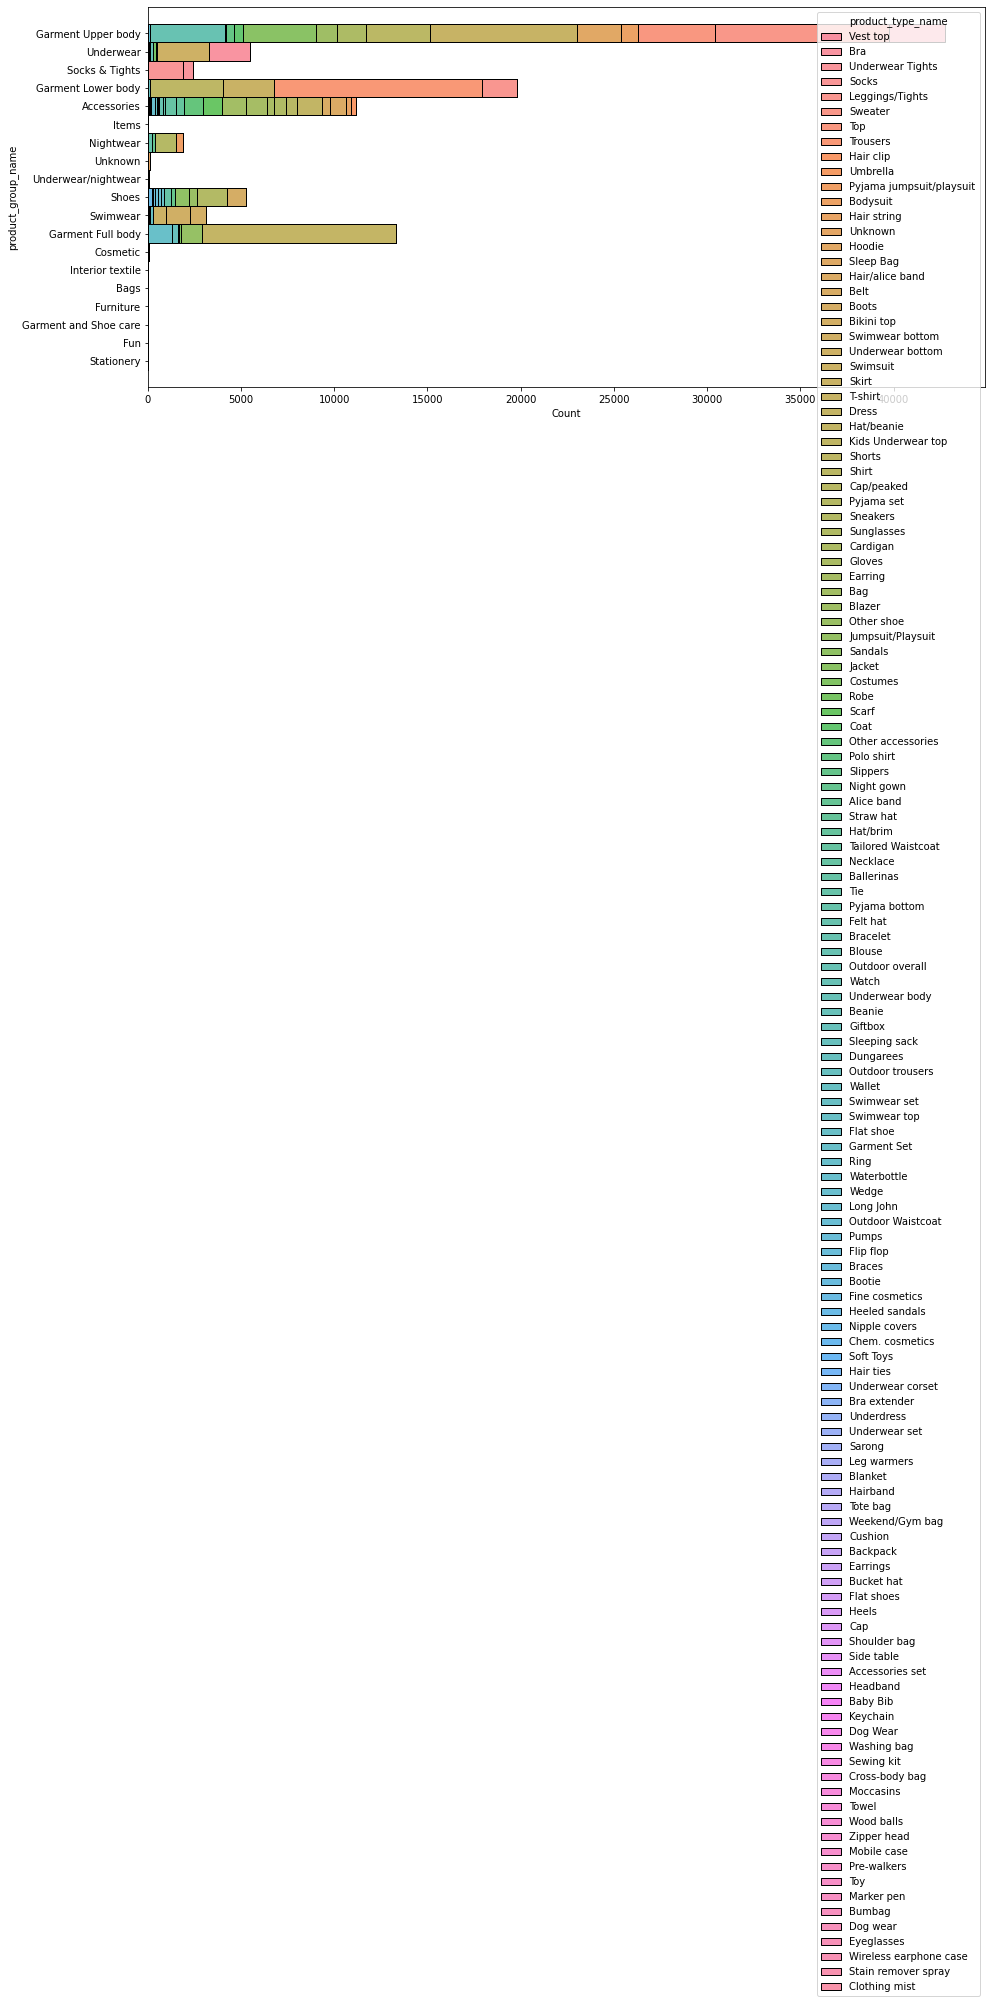

In [5]:
f, ax = plt.subplots(figsize = (15,7))
sns.histplot(data = articles, y = 'product_group_name', hue = 'product_type_name', multiple = 'stack')

In [32]:

groups = articles.groupby(['product_group_name','product_type_name'])
df_g = pd.DataFrame(groups.size())
#모든 행을 보고 싶으면 아래 옵션 추가
pd.set_option('display.max_rows', None)
df_g

0
product_group_name    product_type_name              
Accessories           Accessories set               7
                      Alice band                    6
                      Baby Bib                      3
                      Bag                        1280
                      Beanie                       56
                      Belt                        458
                      Bracelet                    180
                      Braces                        3
                      Bucket hat                    7
                      Cap                          13
                      Cap/peaked                  573
                      Dog Wear                     20
                      Earring                    1159
                      Earrings                     11
                      Eyeglasses                    2
                      Felt hat                     10
                      Giftbox                      15
                      Gloves                      367
                      Hair clip                   244
                      Hair string                 238
                      Hair ties                    24
                      Hair/alice band             854
                      Hairband                      2
                      Hat/beanie                 1349
                      Hat/brim                    396
                      Headband                      1
                      Necklace                    581
                      Other accessories          1034
                      Ring                        240
                      Scarf                      1013
                      Soft Toys                    46
                      Straw hat                     6
                      Sunglasses                  621
                      Tie                         141
                      Umbrella                     26
                      Wallet                       77
                      Watch                        73
                      Waterbottle                  22
Bags                  Backpack                      6
                      Bumbag                        1
                      Cross-body bag                5
                      Shoulder bag                  2
                      Tote bag                      2
                      Weekend/Gym bag               9
Cosmetic              Chem. cosmetics               3
                      Fine cosmetics               46
Fun                   Toy                           2
Furniture             Side table                   13
Garment Full body     Costumes                     90
                      Dress                     10362
                      Dungarees                   309
                      Garment Set                1320
                      Jumpsuit/Playsuit          1147
                      Outdoor overall              64
Garment Lower body    Leggings/Tights            1878
                      Outdoor trousers            130
                      Shorts                     3939
                      Skirt                      2696
                      Trousers                  11169
Garment Upper body    Blazer                     1110
                      Blouse                     3979
                      Bodysuit                    913
                      Cardigan                   1550
                      Coat                        460
                      Hoodie                     2356
                      Jacket                     3940
                      Outdoor Waistcoat           154
                      Polo shirt                  449
                      Shirt                      3405
                      Sweater                    9302
                      T-shirt                    7904
                      Tailored Waistcoat           73
                      Top                        4155
  

In [17]:
df_prod = pd.DataFrame(data=articles, columns=['product_group_name','product_type_name'])
df_prod

,product_group_name,product_type_name
0,Garment Upper body,Vest top
1,Garment Upper body,Vest top
2,Garment Upper body,Vest top
3,Underwear,Bra
4,Underwear,Bra
...,...,...
105537,Socks & Tights,Socks
105538,Garment Upper body,Vest top
105539,Garment Full body,Dress
105540,Accessories,Hair clip


In [53]:
art_group = groups.set_index('product_group_name').T.to_dict('list')
art_group

AttributeError: 'DataFrameGroupBy' object has no attribute 'set_index'

In [54]:
#groupby의 결과를 데이터프레임으로 저장해준다.
a = pd.DataFrame(groups).reset_index()
a
#내가 원하는 결과가 아님... 실패;;

,index,0,1
0,0,"(Accessories, Accessories set)",article_id product_code prod_n...
1,1,"(Accessories, Alice band)",article_id product_code ...
2,2,"(Accessories, Baby Bib)",article_id product_code prod...
3,3,"(Accessories, Bag)",article_id product_code ...
4,4,"(Accessories, Beanie)",article_id product_code ...
...,...,...,...
127,127,"(Underwear, Underwear corset)",article_id product_code ...
128,128,"(Underwear, Underwear set)",article_id product_code ...
129,129,"(Underwear/nightwear, Sleep Bag)",article_id product_code prod_n...
130,130,"(Underwear/nightwear, Sleeping sack)",article_id product_code prod_...


## COLOUR에 대해 알아보자

In [57]:
articles['graphical_appearance_no'].nunique()

30

In [59]:
articles['colour_group_code'].nunique()

50

In [61]:
articles['perceived_colour_value_id'].nunique()

8

In [62]:
articles['perceived_colour_master_id'].nunique()

20

<AxesSubplot:xlabel='count', ylabel='colour_group_name'>

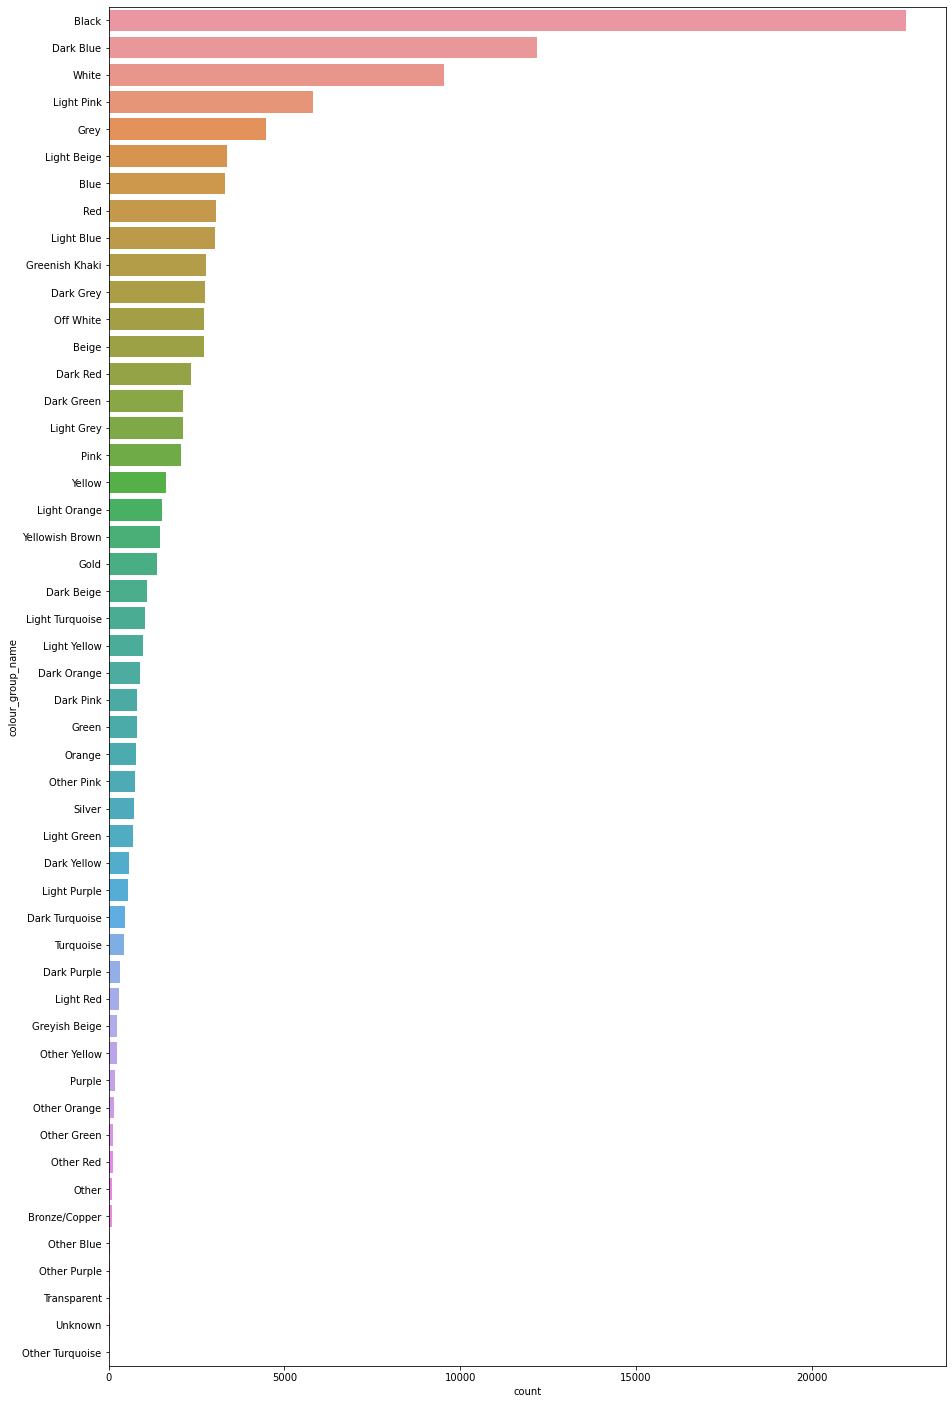

In [10]:
f, ax = plt.subplots(figsize = (15, 25))
sns.countplot(data = articles, y = 'colour_group_name', order = articles['colour_group_name'].value_counts().index)

<AxesSubplot:xlabel='Count', ylabel='colour_group_name'>

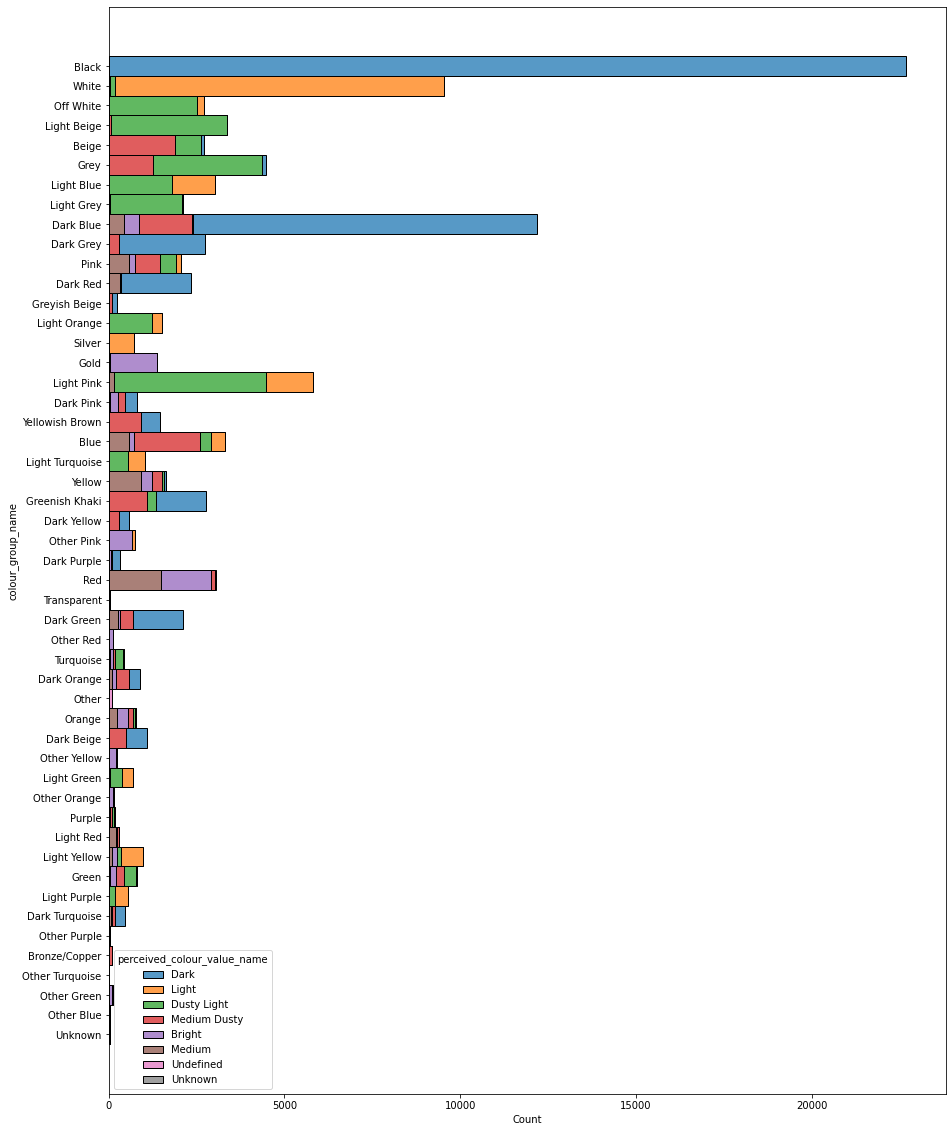

In [65]:
f, ax = plt.subplots(figsize = (15,20))
sns.histplot(data = articles, y = 'colour_group_name', hue = 'perceived_colour_value_name', multiple = 'stack')

<AxesSubplot:xlabel='Count', ylabel='colour_group_name'>

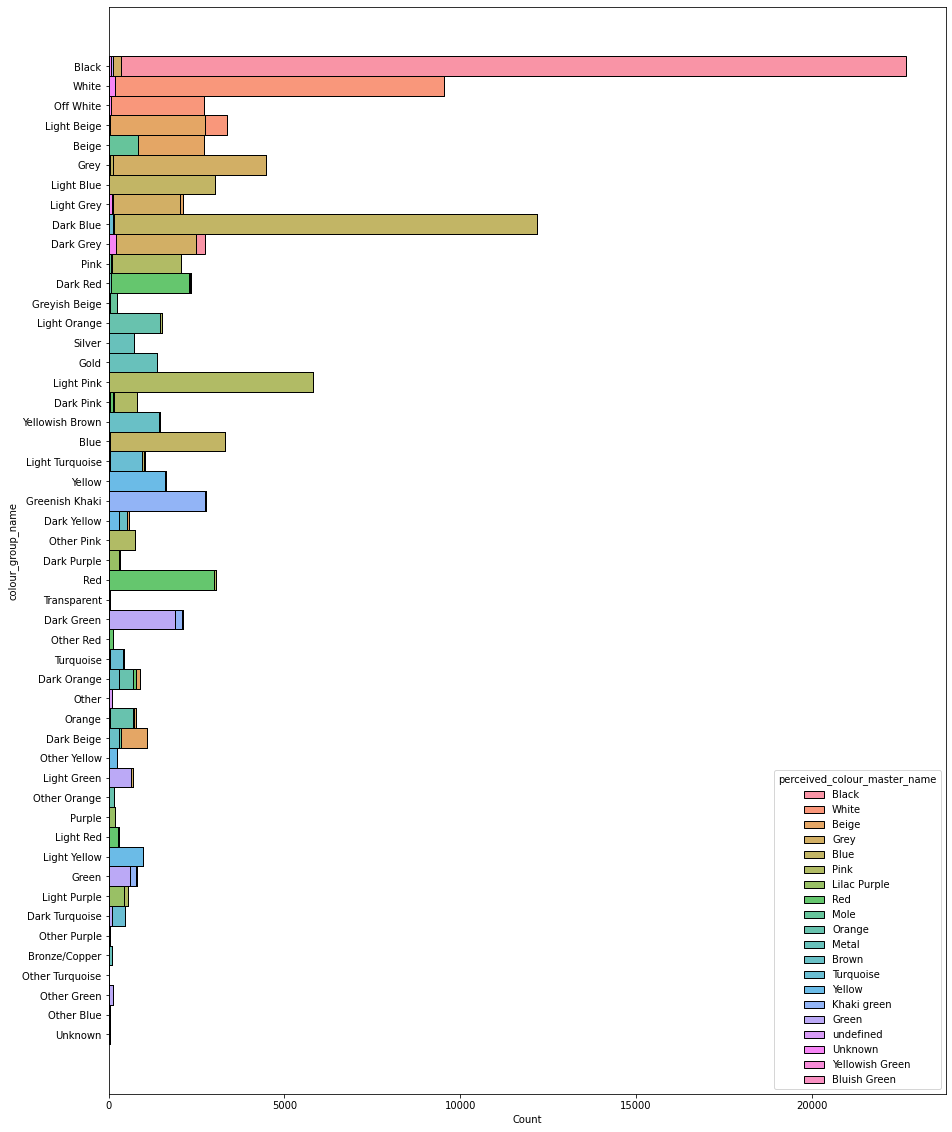

In [67]:
f, ax = plt.subplots(figsize = (15,20))
sns.histplot(data = articles, y = 'colour_group_name', hue = 'perceived_colour_master_name', multiple = 'stack')

## department, index, section, garment_group에 대해 알아보기

In [39]:
df_class = pd.DataFrame(articles.groupby(['index_group_name','index_name']).size())
df_class

0
index_group_name index_name                           
Baby/Children    Baby Sizes 50-98                 8875
                 Children Accessories, Swimwear   4615
                 Children Sizes 134-170           9214
                 Children Sizes 92-140           12007
Divided          Divided                         15149
Ladieswear       Ladies Accessories               6961
                 Ladieswear                      26001
                 Lingeries/Tights                 6775
Menswear         Menswear                        12553
Sport            Sport                            3392

In [40]:
df_class = pd.DataFrame(articles.groupby(['index_group_name','index_name','department_name']).size())
df_class

0
index_group_name index_name                     department_name                               
Baby/Children    Baby Sizes 50-98               Baby Boy Jersey Fancy                      872
                                                Baby Boy Knitwear                          140
                                                Baby Boy Local Relevance                     3
                                                Baby Boy Outdoor                           205
                                                Baby Boy Woven                             500
                                                Baby Exclusive                             944
                                                Baby Girl Jersey Fancy                     859
                                                Baby Girl Knitwear                         257
                                                Baby Girl Local Relevance                    6
                                                Baby Girl Outdoor                          123
                                                Baby Girl Woven                            521
                                                Baby Nightwear                             420
                                                Baby Shoes                                 457
                                                Baby Socks                                 465
                                                Baby Toys/Acc                             1054
                                                Baby basics                               1147
                                                Newborn                                    853
                                                Promotion / Other / Offer                   49
                 Children Accessories, Swimwear Boys Small Acc & Bags                       55
                                                Dress-up Boys                               89
                                                Girls Small Acc/Bags                       653
                                                Kids Boy Big Acc                           398
                                                Kids Boy Shoes                             446
                                                Kids Boy Swimwear                          150
                                                Kids Dress-up/Football                     262
                                                Kids Girl Big Acc                          402
                                                Kids Girl Shoes                            628
                                                Kids Girl Swimwear                         197
                                                Small Acc. Jewellery & Other                36
                                                Sneakers big girl inactive from s2          25
                                                Sneakers small girl inactive from s2        39
                                                Young Boy Big Acc                          197
                                                Young Boy Shoes                            260
                                                Young Girl Big Acc                         202
                                                Young Girl Shoes                           287
                                                Young Girl Swimwear                        175
                                                Young boy Swimwear                         114
                 Children Sizes 134-170         License                                     21
                                                Young Boy Denim                            363
                                                Young Boy Jersey Basic                     462
                                                Young Boy Jersey Fancy                    1100
        

In [50]:
df_class = pd.DataFrame(articles.groupby(['index_group_name','section_name']).size())
df_class

,0
index_group_name,
Baby/Children,34711
Divided,15149
Ladieswear,39737
Menswear,12553
Sport,3392


In [49]:
df_class = pd.DataFrame(articles.groupby(['garment_group_name']).size())
df_class

,0
garment_group_name,
Accessories,11519
Blouses,5838
Dressed,908
Dresses Ladies,4874
Dresses/Skirts girls,1541
Jersey Basic,8126
Jersey Fancy,21445
Knitwear,7490
Outdoor,4501
